# Projects for Analysis of Anti-Depressant Drugs’s Adverse Events by FDA Adverse Event Reporting System (FAERS) from January 2019 to December 2023

## 4. EDA

In [1]:
# load library
import pandas as pd
import numpy as np
import re

### 4.1 Check final data overview

In [2]:
# load data
data = pd.read_csv('FAERS_mapped_data.csv')

In [3]:
data.head(10)

,primaryid,role_cod,prod_ai,indi_pt,event_dt,age,age_grp,gender,occr_country,pt,outc_cod,prod_ai_group,drug_cate,ae_cate
0,74189024,primary suspect,sertraline,depressive symptom,2023-10-26,29.0,adult,female,portugal,movement disorder,hospitalisation,selective serotonin reuptake inhibitors,antidepressants,nervous system disorders
1,74189024,primary suspect,sertraline,depressive symptom,2023-10-26,29.0,adult,female,portugal,tremor,hospitalisation,selective serotonin reuptake inhibitors,antidepressants,nervous system disorders
2,74189024,primary suspect,sertraline,depressive symptom,2023-10-26,29.0,adult,female,portugal,conversion disorder,hospitalisation,selective serotonin reuptake inhibitors,antidepressants,psychiatric disorders
3,74189024,primary suspect,sertraline,depressive symptom,2023-10-26,29.0,adult,female,portugal,torticollis,hospitalisation,selective serotonin reuptake inhibitors,antidepressants,musculoskeletal and connective tissue disorders
4,109174139,primary suspect,oxcarbazepine,depression,2023-10-16,47.0,adult,female,spain,adverse event,hospitalisation,anticonvulsants,others,general disorders and administration site cond...
5,109174139,primary suspect,oxcarbazepine,depression,2023-10-16,47.0,adult,female,spain,conjunctivitis,hospitalisation,anticonvulsants,others,infections and infestations
6,109174139,primary suspect,oxcarbazepine,depression,2023-10-16,47.0,adult,female,spain,vision blurred,hospitalisation,anticonvulsants,others,eye disorders
7,109174139,primary suspect,oxcarbazepine,depression,2023-10-16,47.0,adult,female,spain,psoriasis,hospitalisation,anticonvulsants,others,skin and subcutaneous tissue disorders
8,109174139,primary suspect,oxcarbazepine,depression,2023-10-16,47.0,adult,female,spain,eye irritation,hospitalisation,anticonvulsants,others,eye disorders
9,109174139,primary suspect,oxcarbazepine,depression,2023-10-16,47.0,adult,female,spain,intestinal obstruction,hospitalisation,anticonvulsants,others,gastrointestinal disorders


In [4]:
# Convert primaryid to an object type
data['primaryid'] = data['primaryid'].astype(str)
data['event_dt'] = pd.to_datetime(data['event_dt'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118577 entries, 0 to 118576
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   primaryid      118577 non-null  object        
 1   role_cod       118577 non-null  object        
 2   prod_ai        118577 non-null  object        
 3   indi_pt        118577 non-null  object        
 4   event_dt       118577 non-null  datetime64[ns]
 5   age            118577 non-null  float64       
 6   age_grp        118577 non-null  object        
 7   gender         118577 non-null  object        
 8   occr_country   118577 non-null  object        
 9   pt             118577 non-null  object        
 10  outc_cod       118577 non-null  object        
 11  prod_ai_group  118577 non-null  object        
 12  drug_cate      118577 non-null  object        
 13  ae_cate        118577 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory 

In [5]:
# Check for duplicates and missing values
print("Duplicated rows:", data.duplicated().sum())
print("Missing values:\n", data.isnull().sum())

Duplicated rows: 0
Missing values:
 primaryid        0
role_cod         0
prod_ai          0
indi_pt          0
event_dt         0
age              0
age_grp          0
gender           0
occr_country     0
pt               0
outc_cod         0
prod_ai_group    0
drug_cate        0
ae_cate          0
dtype: int64


### 4.2 Summary data

In [6]:
data.describe(include='all').T

/var/folders/_z/wx40qqws337c64bjr5v3vh_80000gn/T/ipykernel_69289/3536075253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
primaryid,118577,35652,2011608320,60,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
role_cod,118577,1,primary suspect,118577,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prod_ai,118577,173,sertraline,17714,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indi_pt,118577,19,depression,91358,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_dt,118577,2162,2019-01-01 00:00:00,1886,2018-01-01,2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,118577.0,NaN,NaN,NaN,NaT,NaT,49.645322,19.416225,12.0,34.0,50.0,64.0,103.0
age_grp,118577,3,adult,81583,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,118577,2,female,81612,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occr_country,118577,21,united states,39709,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pt,118577,3682,nausea,2183,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.3 Temporal analysis (ae_cate vs event_dt)

In [7]:
data['ae_cate'].value_counts()

psychiatric disorders                                   27952
nervous system disorders                                21113
general disorders and administration site conditions    13557
gastrointestinal disorders                              10097
investigations                                           6316
skin and subcutaneous tissue disorders                   4288
injury poisoning and procedural complications            3842
others                                                   3731
cardiac disorders                                        3678
musculoskeletal and connective tissue disorders          3592
metabolism and nutrition disorders                       3448
respiratory thoracic and mediastinal disorders           3263
eye disorders                                            2540
vascular disorders                                       2363
hepatobiliary disorders                                  1662
reproductive system and breast disorders                 1635
renal an

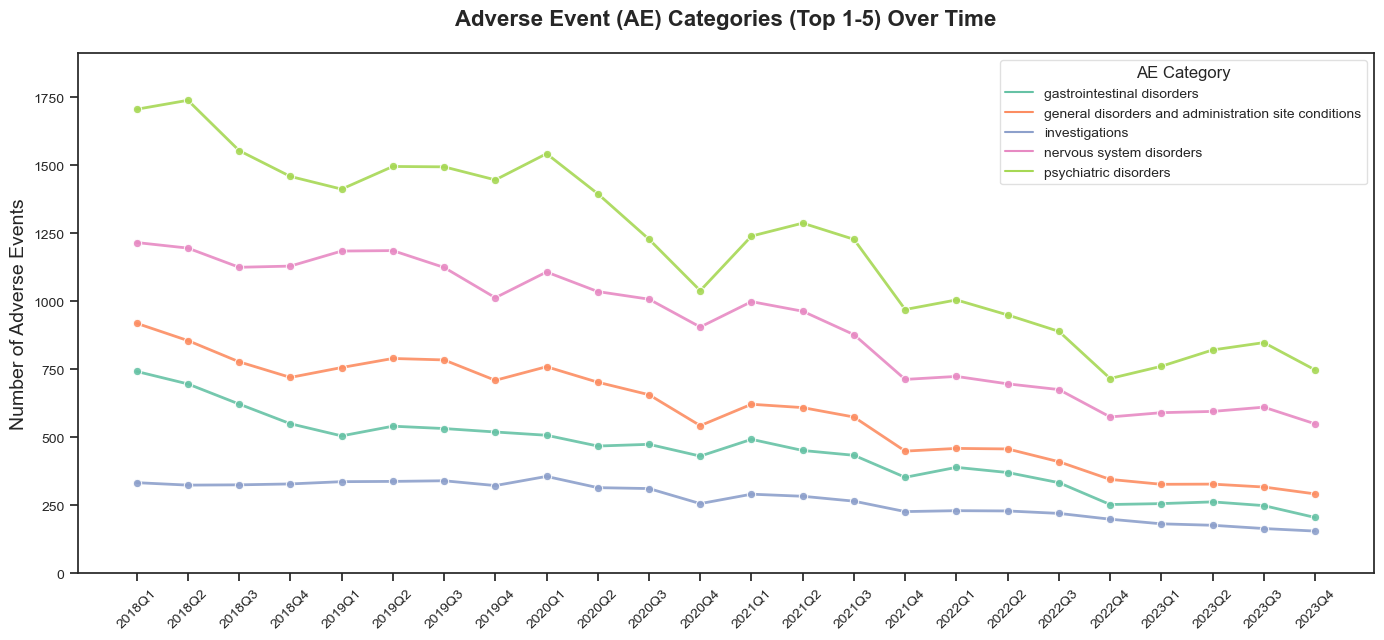

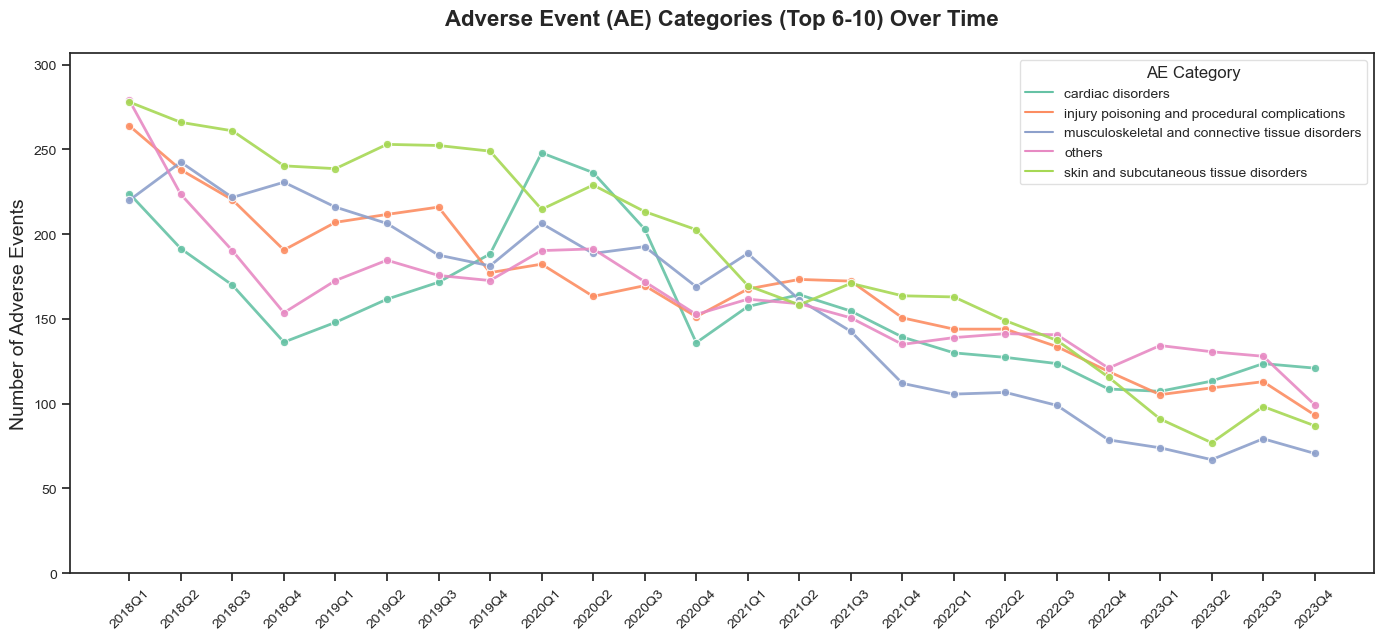

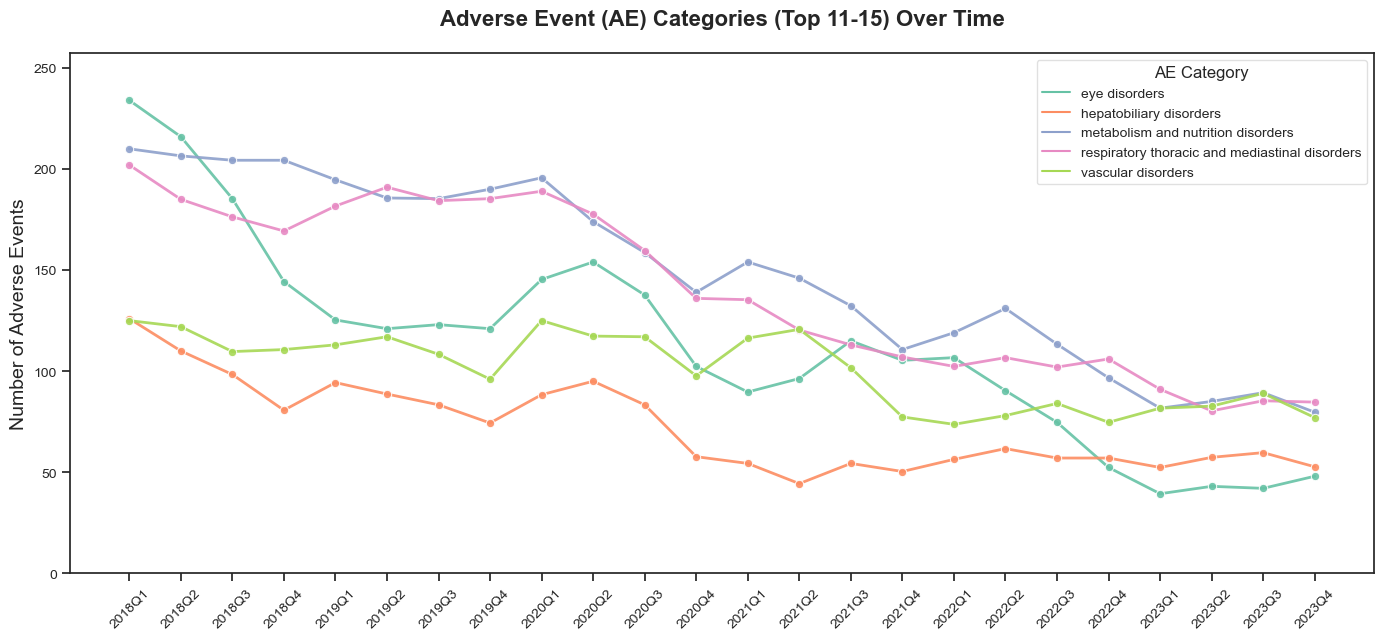

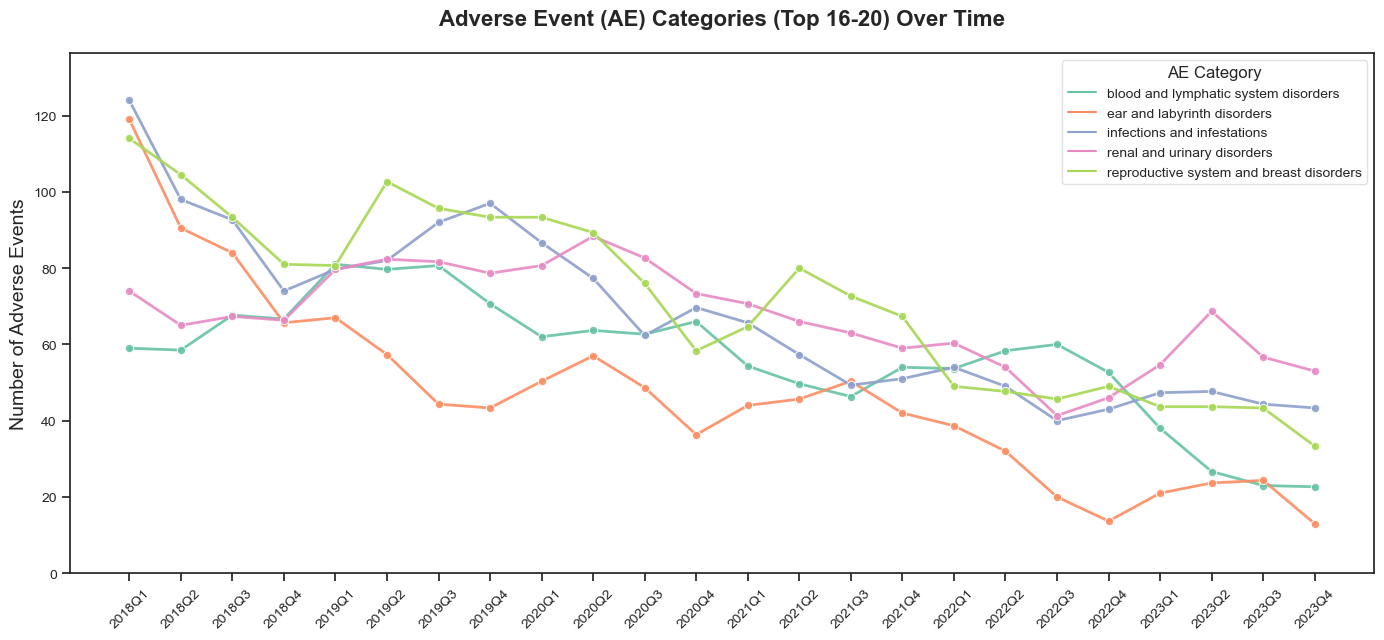

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style without grid lines and make aesthetics a bit more neutral
sns.set_theme(style="ticks")

# Function to calculate rolling mean for smoothing
def smooth_data(df, window=3):
    df['count_smooth'] = df.groupby('ae_cate')['count'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    return df

# Extract quarterly data
data['event_quarter'] = data['event_dt'].dt.to_period('Q')

# Count total adverse events per category
total_counts = data['ae_cate'].value_counts()

# Get the top 20 categories based on total count
top_20_categories = total_counts.index[:20]

# Filter data to create the trend for top 20 categories
top_20_data = data[data['ae_cate'].isin(top_20_categories)]

# Group by quarter and category for top 20 categories
ae_trend = top_20_data.groupby(['event_quarter', 'ae_cate']).size().reset_index(name='count')
ae_trend['event_quarter'] = ae_trend['event_quarter'].astype(str)

# Apply smoothing to data
ae_trend = smooth_data(ae_trend, window=3)

# Split the top 20 categories into groups of 5
categories_split = [top_20_categories[i:i+5] for i in range(0, len(top_20_categories), 5)]

# Plotting each group of 5 adverse event categories
for idx, categories in enumerate(categories_split):
    plt.figure(figsize=(14, 7))
    subset_data = ae_trend[ae_trend['ae_cate'].isin(categories)]
    
    # Using a distinct palette for each plot
    palette = sns.color_palette("Set2", len(categories))  # Use a colorful palette for better distinction

    # Lineplot for each group of 5 categories
    sns.lineplot(
        data=subset_data, 
        x='event_quarter', 
        y='count_smooth', 
        hue='ae_cate', 
        marker='o', 
        palette=palette,
        linewidth=2,
        alpha=0.9
    )

    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    # show the actual range of top categories in each plot
    plt.title(f'Adverse Event (AE) Categories (Top {idx * 5 + 1}-{(idx + 1) * 5}) Over Time', fontsize=16, weight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('Number of Adverse Events', fontsize=14)
    
    # Increase the y-axis limit to leave space for the legend
    max_count = subset_data['count_smooth'].max()
    plt.ylim(0, max_count * 1.1)

    plt.legend(title='AE Category', loc='upper right', fontsize=10, frameon=True, framealpha=0.6)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

### 4.4 Adverse event analysis (pt vs ae_cate)

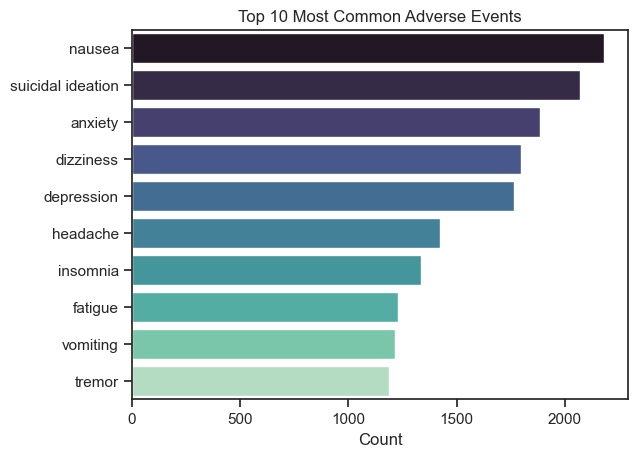

In [9]:
# top 10 common AEs
top_adverse_events = data['pt'].value_counts().nlargest(10)
sns.barplot(x=top_adverse_events.values, y=top_adverse_events.index, palette='mako')
plt.title('Top 10 Most Common Adverse Events')
plt.xlabel('Count')
plt.show()

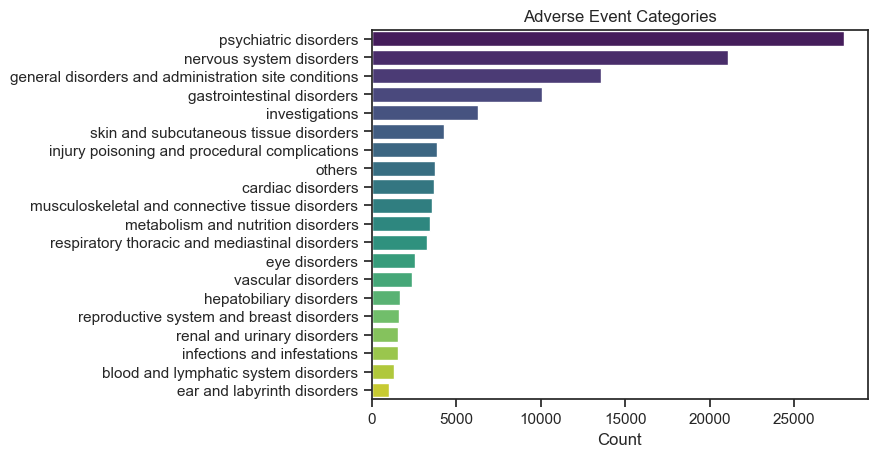

In [10]:
# plot ae_cate
sns.countplot(y='ae_cate', data=data, order=data['ae_cate'].value_counts().index, palette='viridis')
plt.title('Adverse Event Categories')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

### 4.5 Drug analysis

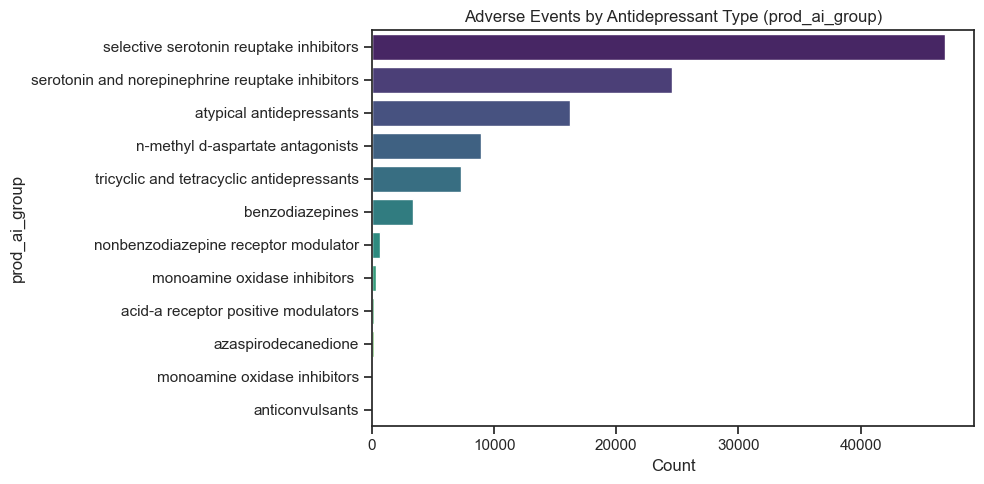

In [11]:
# adverse events across prod_ai_group for 'antidepressants'
import matplotlib.pyplot as plt
import seaborn as sns

antidepressant_data = data[data['drug_cate'] == 'antidepressants']

plt.figure(figsize=(10, 5))
sns.countplot(y='prod_ai_group', data=antidepressant_data, order=antidepressant_data['prod_ai_group'].value_counts().index, palette='viridis')
plt.title('Adverse Events by Antidepressant Type (prod_ai_group)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

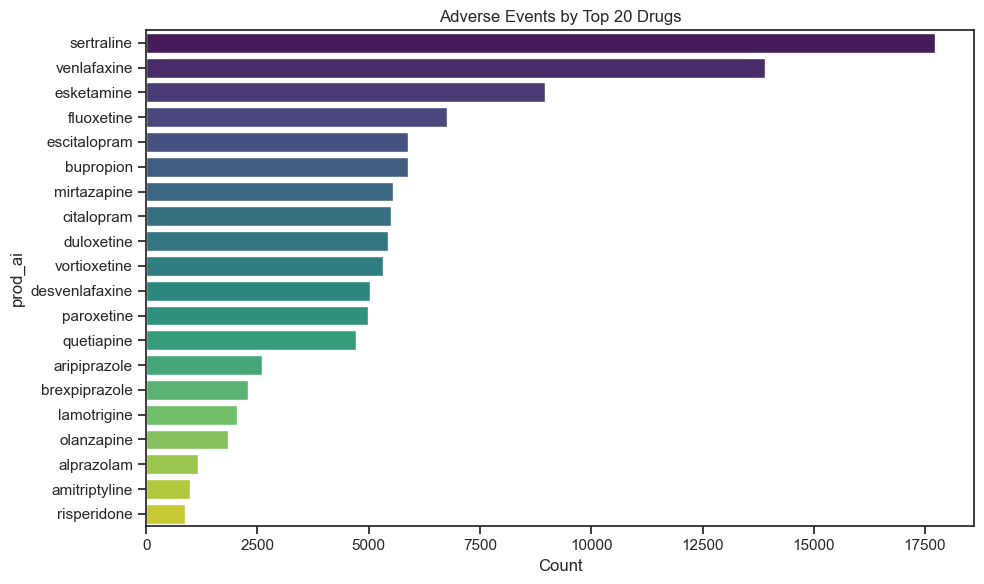

In [12]:
top_10_drugs = data['prod_ai'].value_counts().nlargest(20).index
filtered_data = data[data['prod_ai'].isin(top_10_drugs)]

plt.figure(figsize=(10, 6))
sns.countplot(y='prod_ai', data=filtered_data, palette='viridis', order=filtered_data['prod_ai'].value_counts().index)
plt.title('Adverse Events by Top 20 Drugs')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


### 4.6 Summary age, gender, occ_country, outc_cod

In [13]:
# Filter data to keep only unique primaryid values
unique_patient_data = data.drop_duplicates(subset='primaryid')

In [14]:
# Summary table for age_grp, gender, occr_country, and outcome (outc_cod)
summary_columns = ['age_grp', 'gender', 'occr_country', 'outc_cod']
summary = {}

for column in summary_columns:
    count_data = unique_patient_data[column].value_counts().sort_values(ascending=False)
    percentage_data = unique_patient_data[column].value_counts(normalize=True).sort_values(ascending=False) * 100
    summary_df = pd.DataFrame({'Count': count_data, 'Percentage (%)': percentage_data.round(2)})
    summary[column] = summary_df

# Display summary for each column in descending order
for column, summary_df in summary.items():
    print(f"\nSummary for {column}:\n")
    display(summary_df)


Summary for age_grp:



,Count,Percentage (%)
adult,23525,65.99
elderly,9725,27.28
adolescent,2402,6.74



Summary for gender:



,Count,Percentage (%)
female,24070,67.51
male,11582,32.49



Summary for occr_country:



,Count,Percentage (%)
united states,12449,34.92
france,5545,15.55
united kingdom,4796,13.45
italy,1886,5.29
others,1733,4.86
canada,1701,4.77
germany,1591,4.46
spain,1174,3.29
japan,1165,3.27
poland,532,1.49



Summary for outc_cod:



,Count,Percentage (%)
others,21251,59.61
hospitalisation,10186,28.57
life threatening,1430,4.01
disability,1376,3.86
death,1329,3.73
required intervention,47,0.13
congenital anomaly,33,0.09


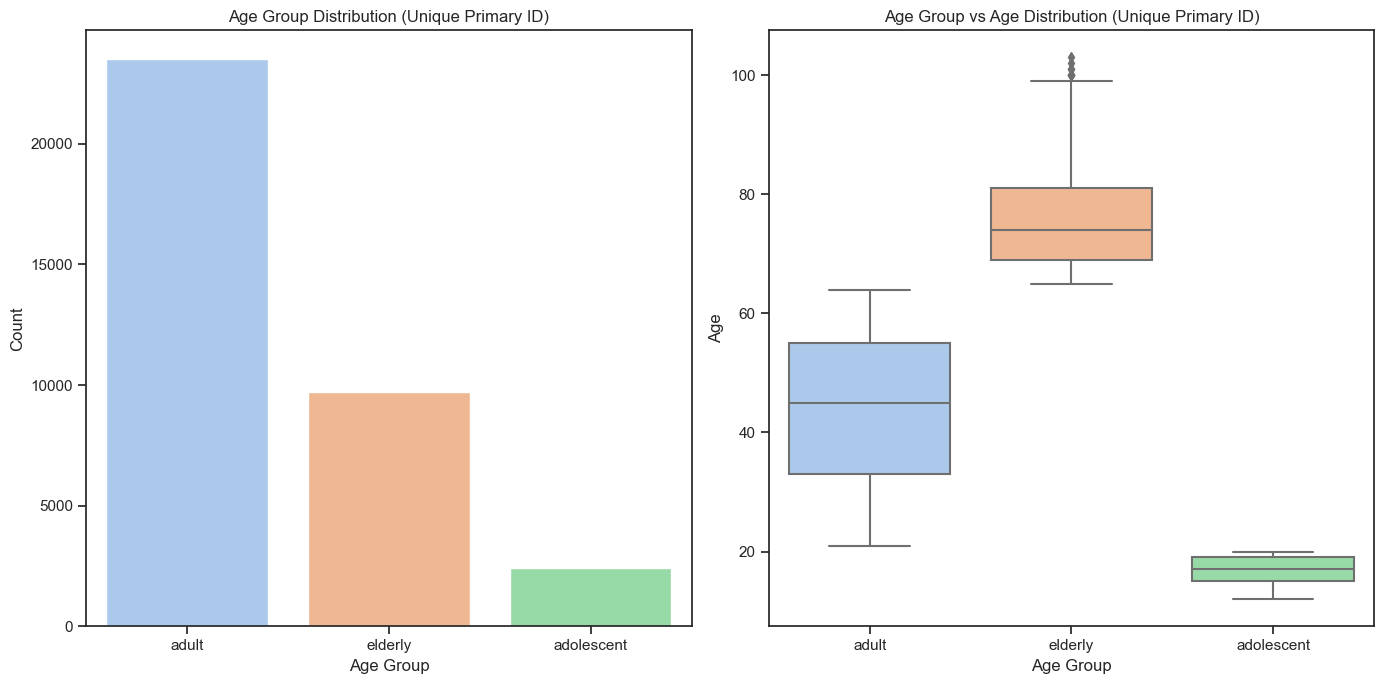

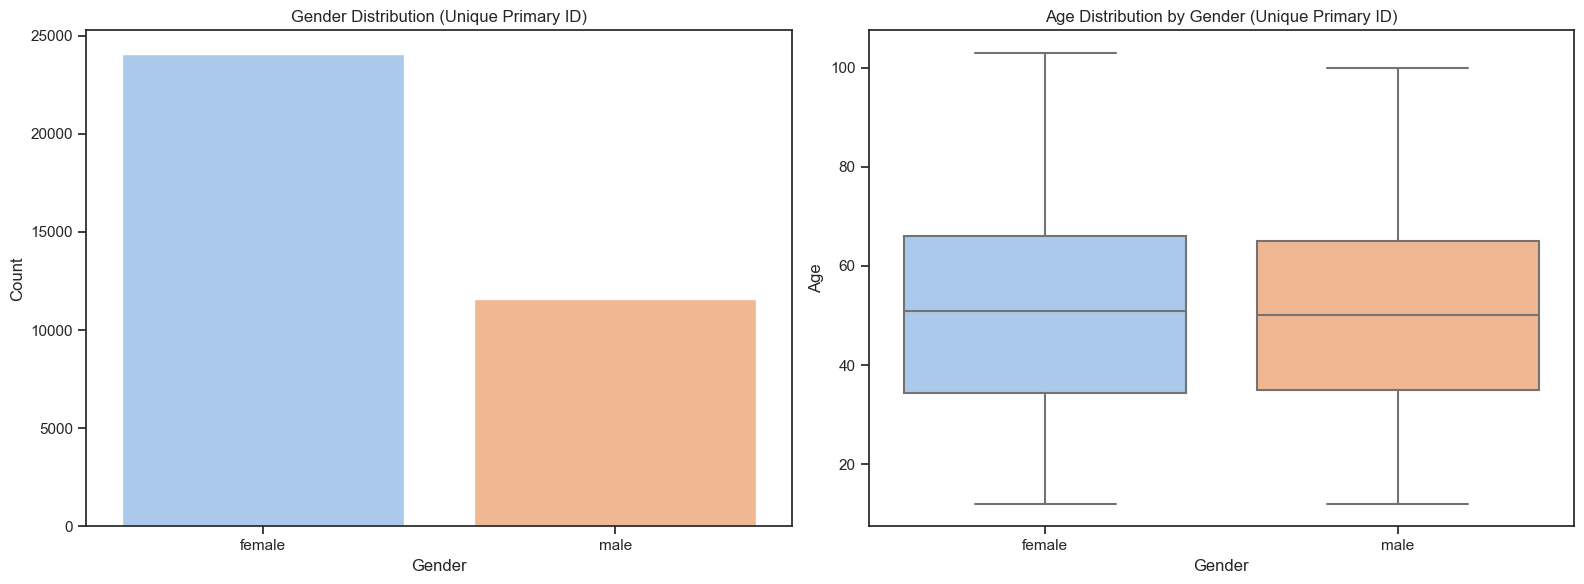

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use unique_patient_data for the analysis
# Set up the figure size for age group distribution
plt.figure(figsize=(14, 7))

# Create subplots for Age Group Distribution using unique data
plt.subplot(1, 2, 1)
sns.countplot(x='age_grp', data=unique_patient_data, palette='pastel')
plt.title('Age Group Distribution (Unique Primary ID)')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='age_grp', y='age', data=unique_patient_data, palette='pastel')
plt.title('Age Group vs Age Distribution (Unique Primary ID)')
plt.xlabel('Age Group')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Set up the figure size for gender-related charts
plt.figure(figsize=(16, 6))

# Create subplots for Gender Distribution using unique data
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=unique_patient_data, palette='pastel')
plt.title('Gender Distribution (Unique Primary ID)')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='age', data=unique_patient_data, palette='pastel')
plt.title('Age Distribution by Gender (Unique Primary ID)')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

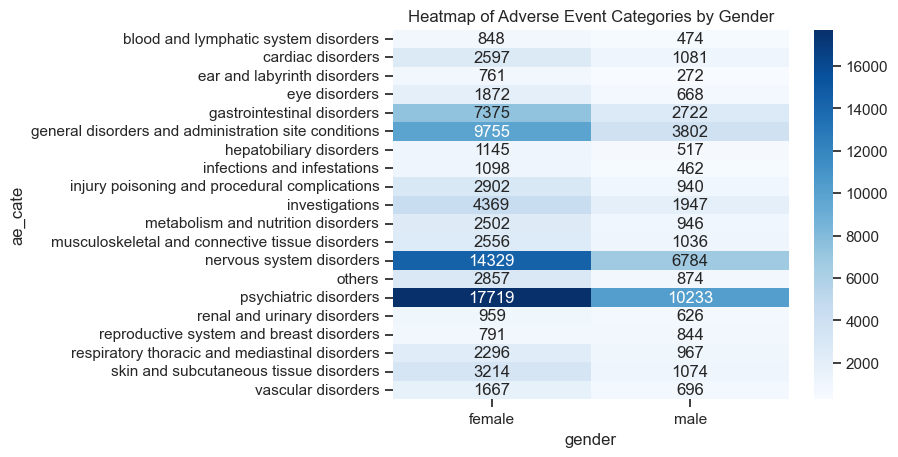

In [16]:
cross_tab = pd.crosstab(data['ae_cate'], data['gender'])
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Adverse Event Categories by Gender')
plt.show()


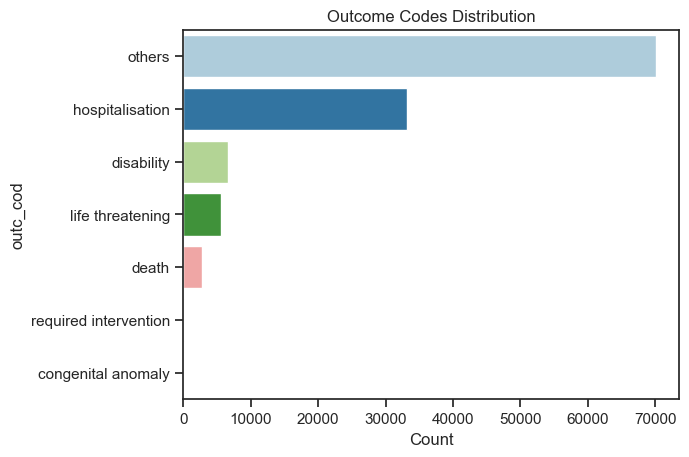

In [17]:
sns.countplot(y='outc_cod', data=data, order=data['outc_cod'].value_counts().index, palette='Paired')
plt.title('Outcome Codes Distribution')
plt.xlabel('Count')
plt.show()

### 4.7 Patient-level analysis

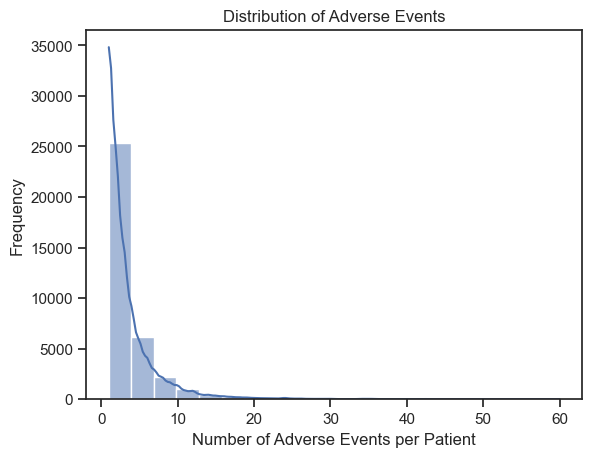

In [18]:
# Count adverse events per patient
adverse_events_per_patient = data.groupby('primaryid')['pt'].count().reset_index()
adverse_events_per_patient.columns = ['primaryid', 'num_adverse_events']

# Plot histogram of number of adverse events per patient
sns.histplot(adverse_events_per_patient['num_adverse_events'], bins=20, kde=True)
plt.title('Distribution of Adverse Events')
plt.xlabel('Number of Adverse Events per Patient')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Merge back to original data to analyze
patient_data = pd.merge(data, adverse_events_per_patient, on='primaryid')

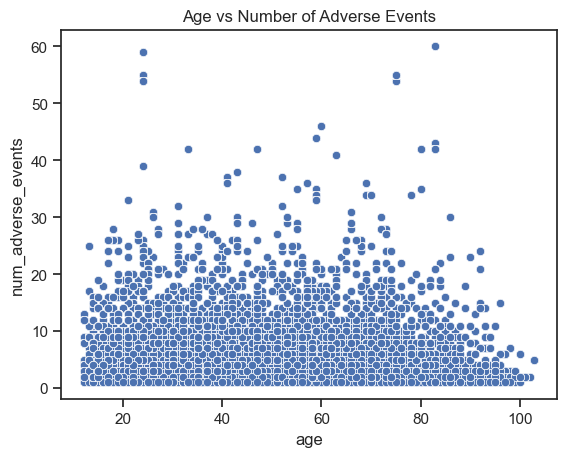

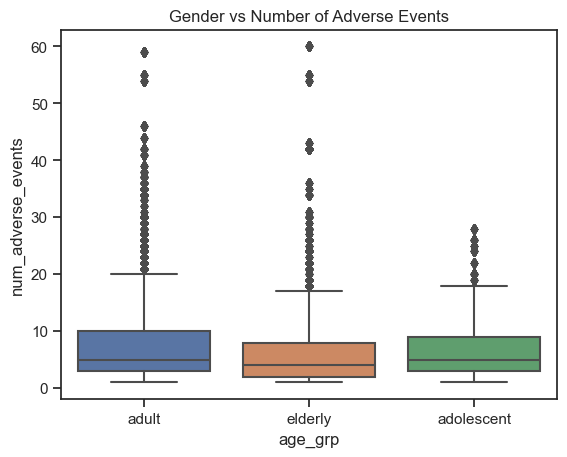

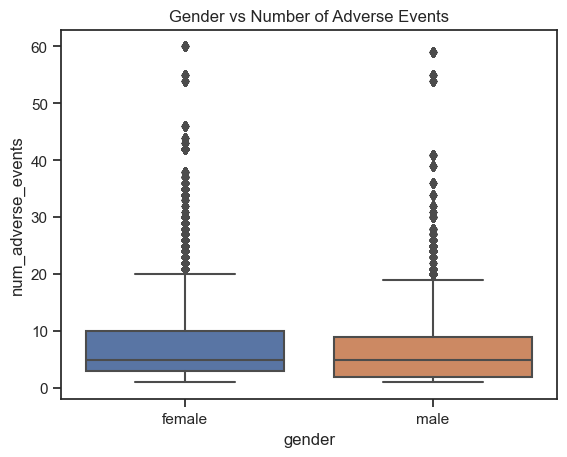

In [20]:
# Scatter plot: Age vs. Number of Adverse Events
sns.scatterplot(x='age', y='num_adverse_events', data=patient_data)
plt.title('Age vs Number of Adverse Events')
plt.show()

# Boxplot: Age Group vs. Number of Adverse Events
sns.boxplot(x='age_grp', y='num_adverse_events', data=patient_data)
plt.title('Gender vs Number of Adverse Events')
plt.show()

# Boxplot: Gender vs. Number of Adverse Events
sns.boxplot(x='gender', y='num_adverse_events', data=patient_data)
plt.title('Gender vs Number of Adverse Events')
plt.show()

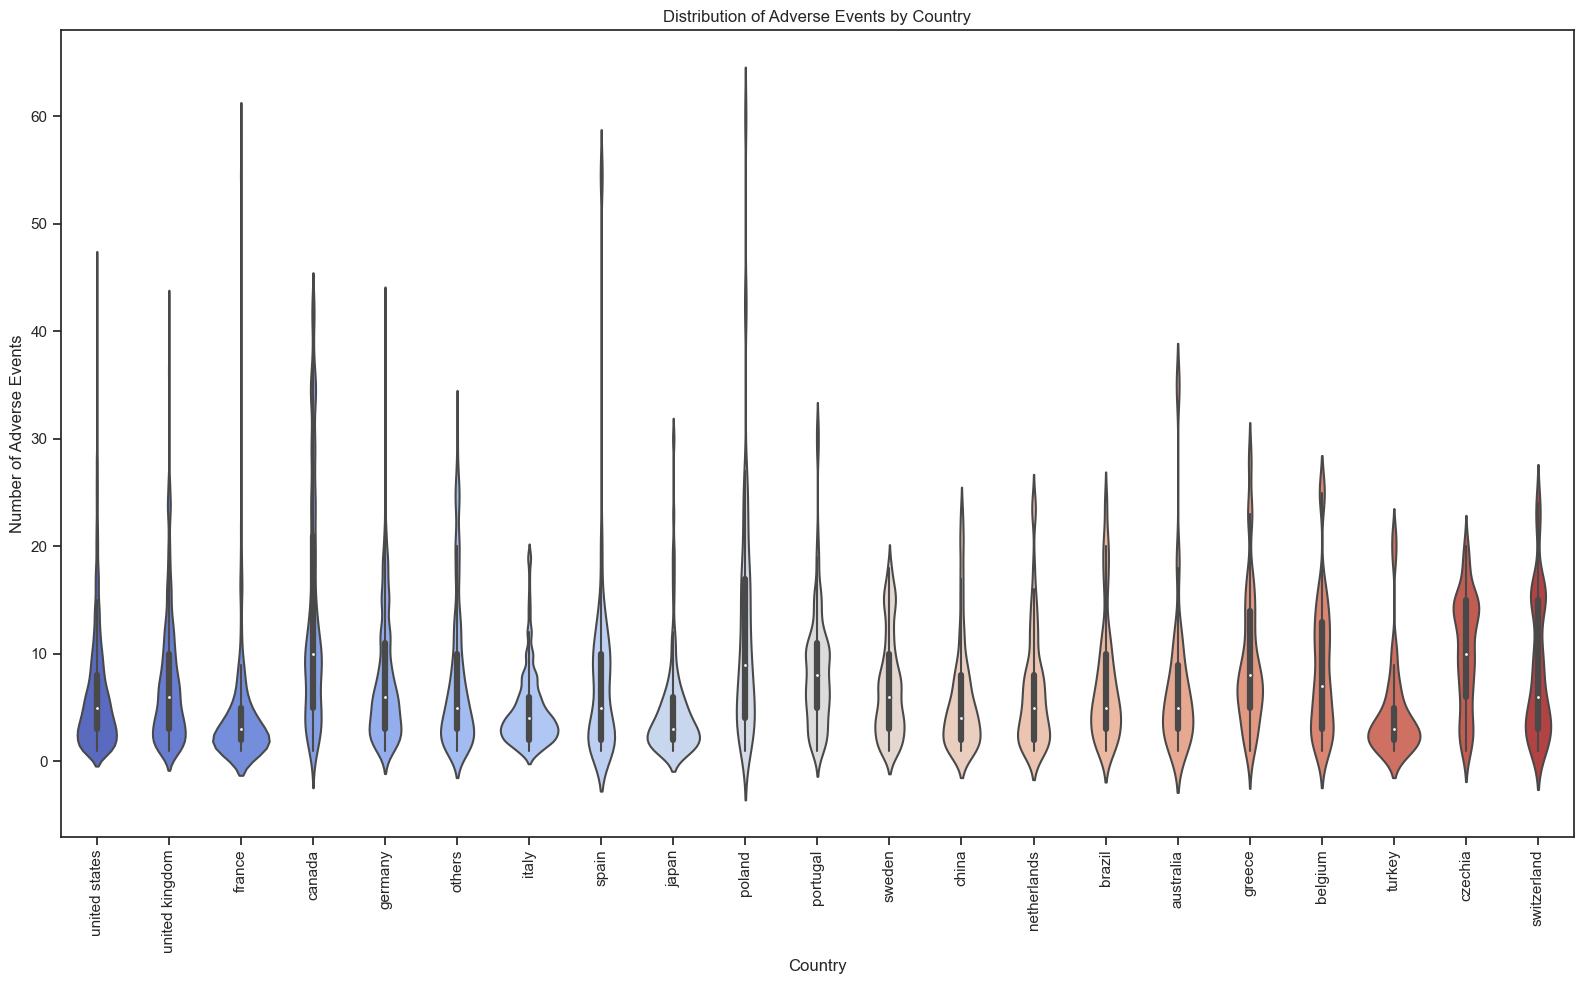

In [21]:
plt.figure(figsize=(16, 10))

# Violin plot for number of adverse events across countries
sns.violinplot(x='occr_country', y='num_adverse_events', data=patient_data, 
               order=patient_data['occr_country'].value_counts().index, palette='coolwarm')

plt.title('Distribution of Adverse Events by Country')
plt.xlabel('Country')
plt.ylabel('Number of Adverse Events')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 4.8 Demo vs ae_cate

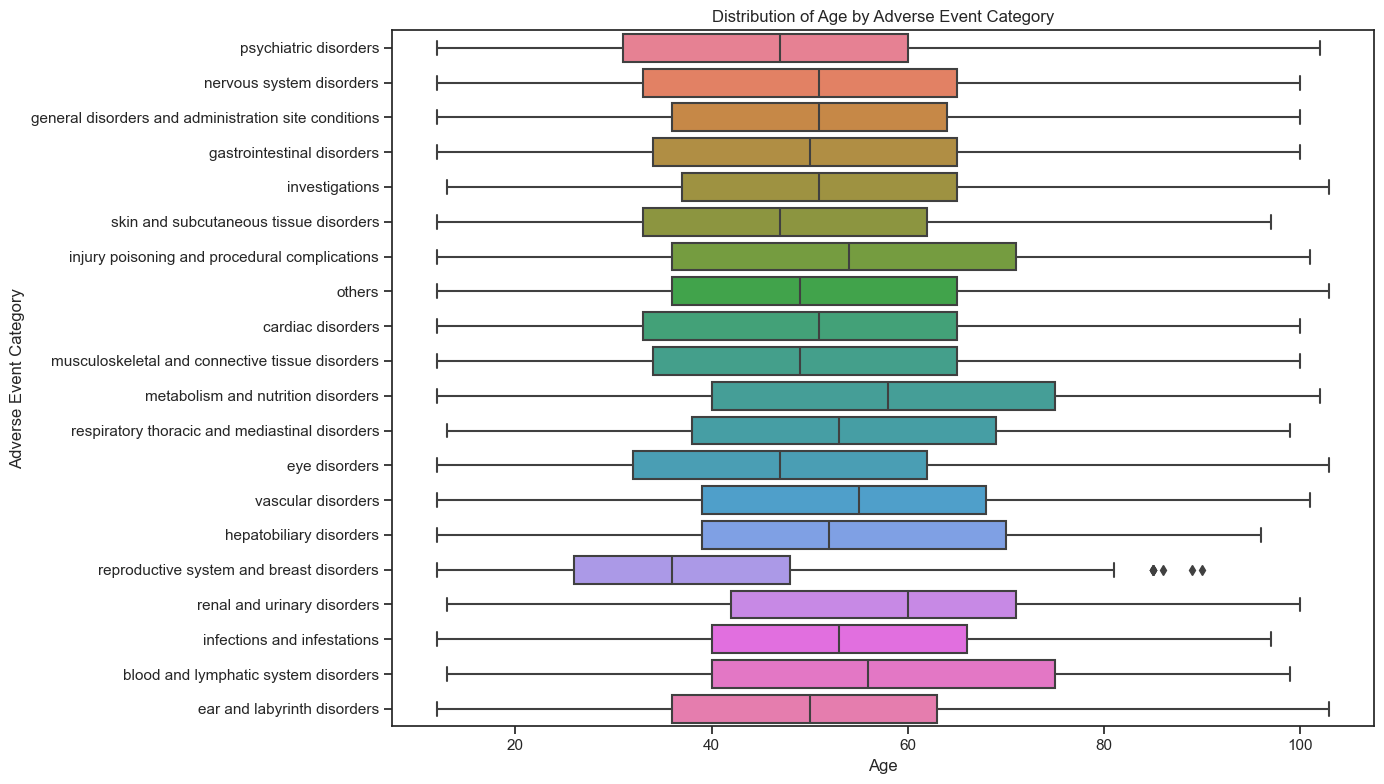

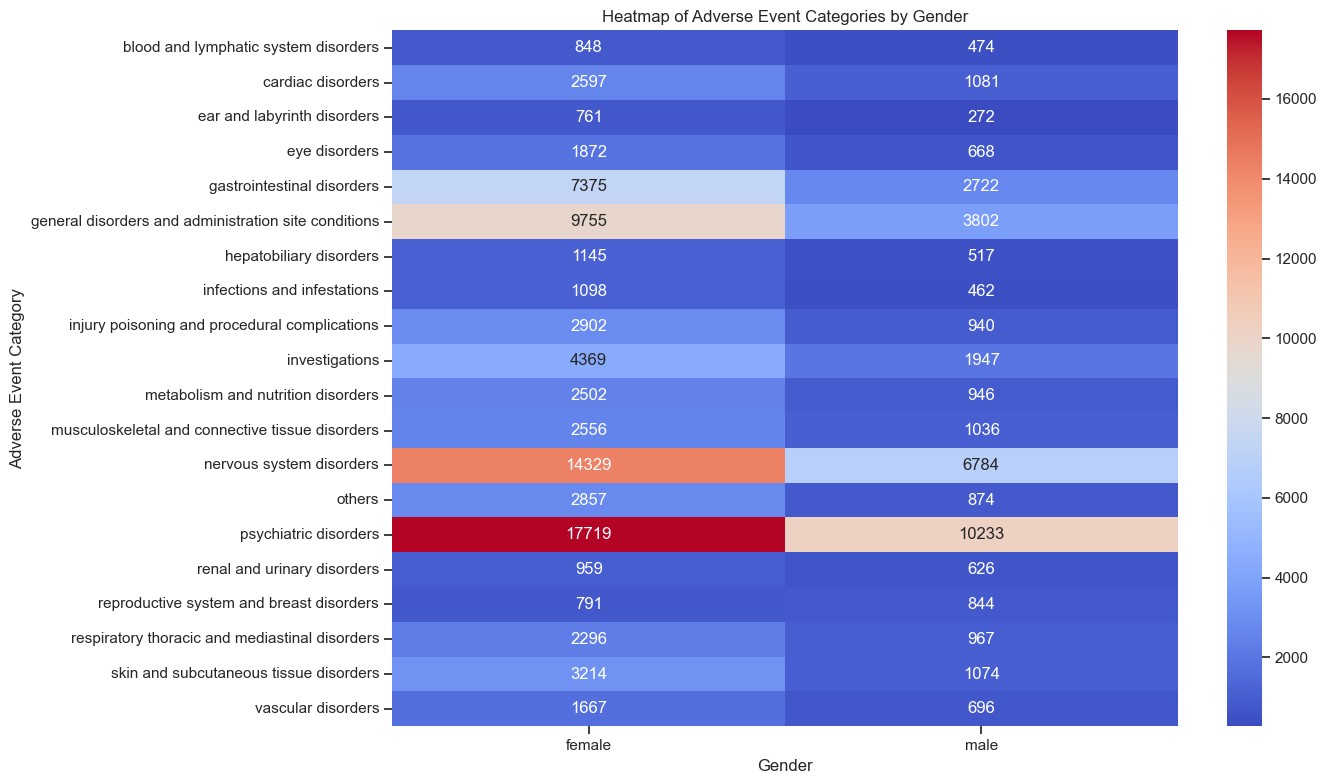

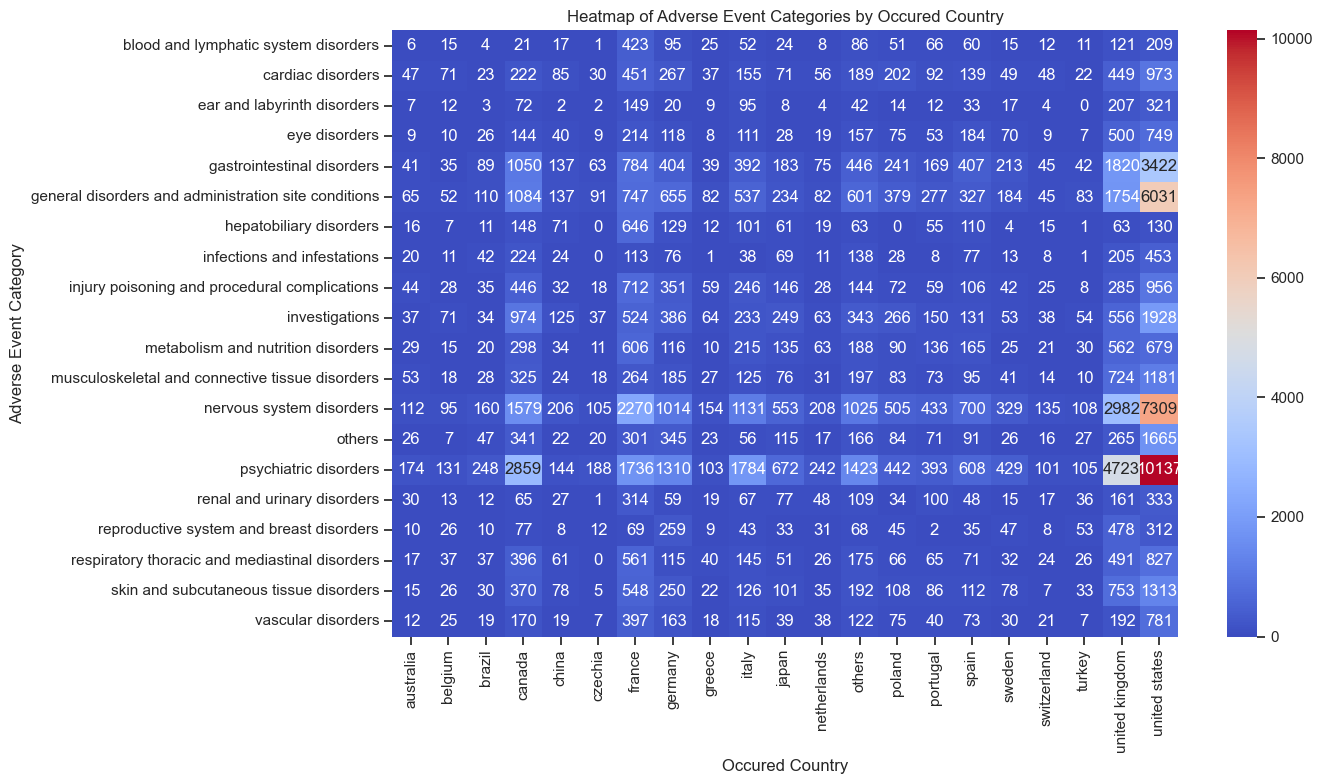

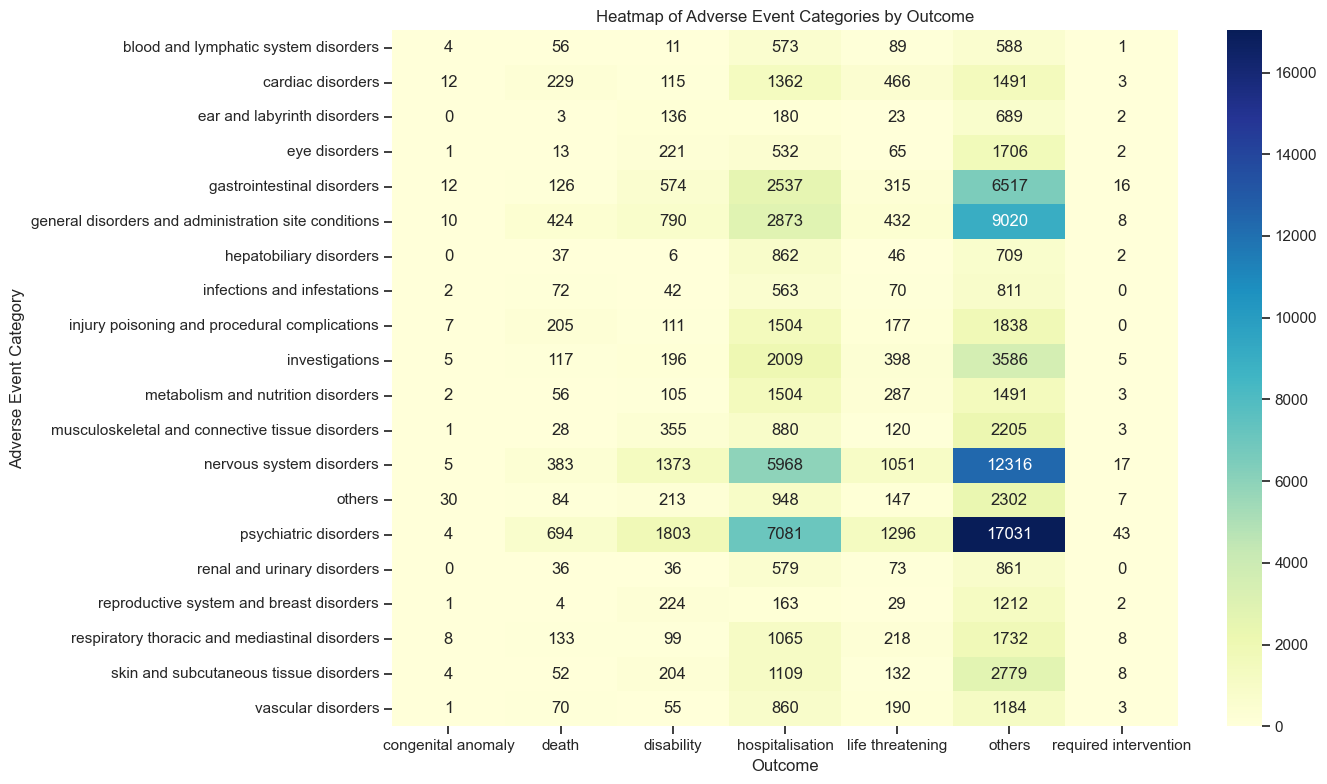

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set seaborn style
sns.set_theme(style="ticks")

# Numerical Feature vs. Adverse Event Category (ae_cate)

# Boxplot: ae_cate vs Age
plt.figure(figsize=(14, 8))
sns.boxplot(y='ae_cate', x='age', data=data, 
            order=data['ae_cate'].value_counts().index, palette='husl')
plt.title('Distribution of Age by Adverse Event Category')
plt.xlabel('Age')
plt.ylabel('Adverse Event Category')
plt.tight_layout()
plt.show()

# Heatmap for Categorical Features (Cross-tabulations)

# Cross-tabulation between ae_cate and gender
cross_tab_gender = pd.crosstab(data['ae_cate'], data['gender'])
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab_gender, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Adverse Event Categories by Gender')
plt.xlabel('Gender')
plt.ylabel('Adverse Event Category')
plt.tight_layout()
plt.show()

# Cross-tabulation between ae_cate and occr_country
cross_tab_gender = pd.crosstab(data['ae_cate'], data['occr_country'])
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab_gender, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Adverse Event Categories by Occured Country')
plt.xlabel('Occured Country')
plt.ylabel('Adverse Event Category')
plt.tight_layout()
plt.show()

# Cross-tabulation between ae_cate and outcome (outc_cod)
cross_tab_outcome = pd.crosstab(data['ae_cate'], data['outc_cod'])
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab_outcome, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Adverse Event Categories by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Adverse Event Category')
plt.tight_layout()
plt.show()


> Refer fda_step5_model for classification ML models